In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from time import time

# Esercizio 1


In [2]:
t_start = time()
domain = np.linspace(0,1, 100)

def analitic(x, C=2):
    return -(x+1)+C*np.exp(x)

In [3]:
def Euler(h, y_0=1, a=1):
    x = 0
    #x = np.arange(0, 1, h)
    max_error = 0
    y = y_0
    while x<1:
        y_prev = y
        y_next=y_prev+h*(x+y_prev)
        local_error = abs(y_next-analitic(x))
        if local_error>max_error:
            max_error = local_error
        if a == 1:
            plt.plot([x,x+h], [y_prev, y_next])
        y = y_next
        x += h
    return max_error

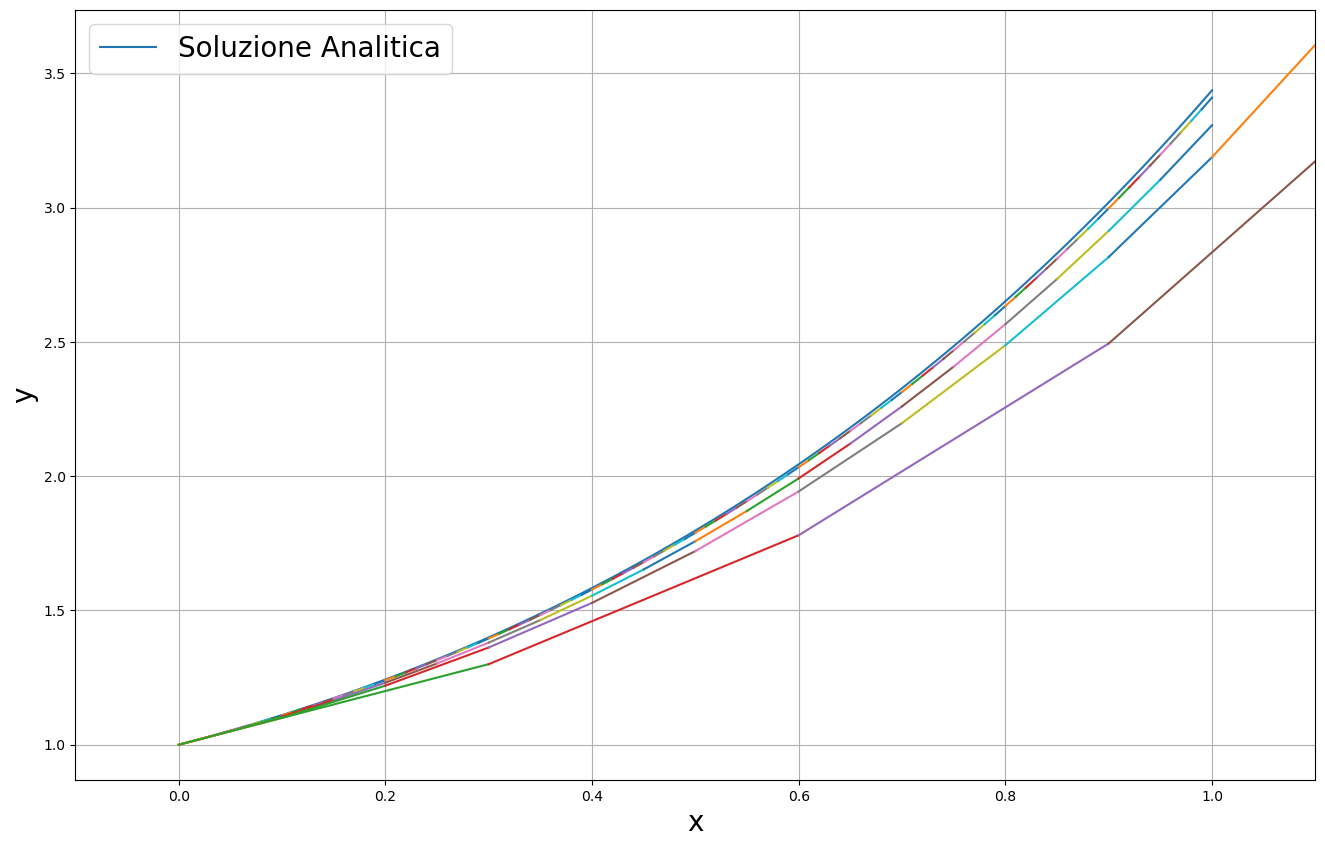

Errore Globale per: h=0.01: 0.0171587141445233 h=0.05: 0.0851760916571469 h=0.1: 0.1696697553019102 h=0.3: 0.49299377768610064
Tempo di elaborazione:  0.4385218620300293 (s)


In [4]:
plt.figure(figsize=(16,10))
plt.xlim(-0.1,1.1)
plt.grid()
plt.plot(domain, analitic(domain, 2), label="Soluzione Analitica")
plot = Euler(.01)
plot2 = Euler(.05)
plot3 = Euler(.1)
plot4 = Euler(.3)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.legend(fontsize=20)
plt.show()
print("Errore Globale per: h=0.01:", Euler(.01, a=0), "h=0.05:", Euler(.05, a=0), "h=0.1:", Euler(.1, a=0),  "h=0.3:", Euler(.3, a=0))
print("Tempo di elaborazione: ", time()-t_start, "(s)")

# Esercizio 2

In [5]:
t_start=time()
def analitic2(x):
    return np.exp(-x**2/2)
def f(x, y):
    return -x*y

def RK4(h, y_0=1, a=1):
    x = 0
    max_error = 0
    y = y_0
    while x<=1:
        y_prev = y
        k_1 = h * f(x, y_prev)
        k_2 = h * f(x+h/2, y_prev+k_1/2)
        k_3 = h * f(x+h/2, y_prev+k_2/2) 
        k_4 = h * f(x+h, y_prev+k_3) 
        y_next=y_prev+(k_1+2*k_2+2*k_3+k_4)/6
        local_error = abs(y_next-analitic2(x))
        if local_error>max_error:
            max_error = local_error
        if a == 1:
            plt.plot([x,x+h], [y_prev, y_next])
        y = y_next
        x += h
    return max_error

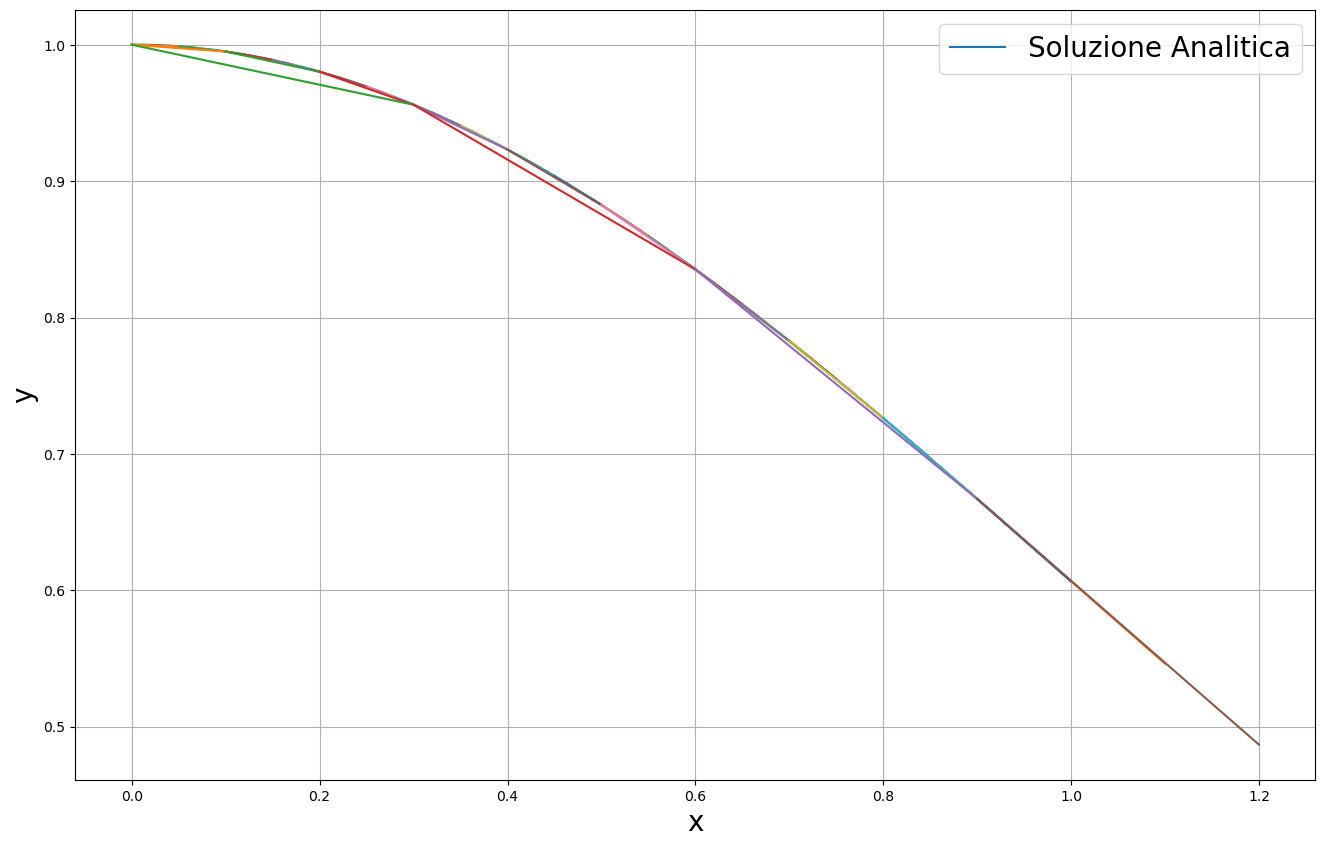

Errore Globale per: h=0.01: 0.006065103909572156 h=0.05: 0.030300949902624108 h=0.1: 0.06045611660278549 h=0.3: 0.18021428716720334
Tempo di elaborazione:  0.3254084587097168 (s)


In [6]:
plt.figure(figsize=(16,10))
plt.grid()
plt.plot(domain, analitic2(domain), label="Soluzione Analitica")
plot = RK4(.01)
plot2 = RK4(.05)
plot3 = RK4(.1)
plot4 = RK4(.3)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.legend(fontsize=20)
plt.show()
print("Errore Globale per: h=0.01:", RK4(.01, a=0), "h=0.05:", RK4(.05, a=0), "h=0.1:", RK4(.1, a=0),  "h=0.3:", RK4(.3, a=0))
print("Tempo di elaborazione: ", time()-t_start, "(s)")

# Esercizio 3

In [7]:
t_start = time()
def fx(t, x, y):
    return x*y+t
def fy(t, x, y):
    return t*y+x

def Felhberg(h,color1, color2, a=1 ):
    t = 0
    x0, y0 = 1, -1
    max_errx = 0
    max_erry = 0
    x,y = x0, y0
    while t+h<=1:
        x_prev, y_prev = x, y
        k_1x = h * fx(t, x_prev, y_prev)
        k_2x = h * fx(t+h/4, x_prev+k_1x/4,y_prev+k_1x/4)
        k_3x = h * fx(t+3*h/8, x_prev+3*k_1x/32+9*k_2x/32,y_prev+3*k_1x/32+9*k_2x/32) 
        k_4x = h * fx(t+12*h/13, x_prev+1932*k_1x/2197-7200*k_2x/2197+7296*k_3x/2197,y_prev+1932*k_1x/2197-7200*k_2x/2197+7296*k_3x/2197)
        k_5x = h * fx(t+h, x_prev+439*k_1x/216-8*k_2x+3680*k_3x/513-845*k_4x/4104,y_prev+439*k_1x/216-8*k_2x+3680*k_3x/513-845*k_4x/4104)
        k_6x = h * fx(t+h/2, x_prev-8*k_1x/27+2*k_2x-3544*k_3x/2565+1859*k_4x/4104-11*k_5x/40,y_prev-8*k_1x/27+2*k_2x-3544*k_3x/2565+1859*k_4x/4104-11*k_5x/40)
        
        k_1y = h * fy(t, x_prev,y_prev)
        k_2y = h * fy(t+h/4, x_prev+k_1y/4,y_prev+k_1y/4)
        k_3y = h * fy(t+3*h/8,x_prev+3*k_1y/32+9*k_2y/32 ,y_prev+3*k_1y/32+9*k_2y/32) 
        k_4y = h * fy(t+12*h/13, x_prev+1932*k_1y/2197-7200*k_2y/2197+7296*k_3y/2197,y_prev+1932*k_1y/2197-7200*k_2y/2197+7296*k_3y/2197)
        k_5y = h * fy(t+h, x_prev+439*k_1y/216-8*k_2y+3680*k_3y/513-845*k_4y/4104,y_prev+439*k_1y/216-8*k_2y+3680*k_3y/513-845*k_4y/4104)
        k_6y = h * fy(t+h/2, x_prev-8*k_1y/27+2*k_2y-3544*k_3y/2565+1859*k_4y/4104-11*k_5y/40,y_prev-8*k_1y/27+2*k_2y-3544*k_3y/2565+1859*k_4y/4104-11*k_5y/40)
        
        x_next5 = x_prev+25*k_1x/216+1408*k_3x/2565+2197*k_4x/4104-k_5x/5
        x_next6 = x_prev+16*k_1x/135+6656*k_3x/12825+28561*k_4x/56430-9*k_5x/50+2*k_6x/55
        y_next5 = y_prev+25*k_1y/216+1408*k_3y/2565+2197*k_4y/4104-k_5y/5
        y_next6 = y_prev+16*k_1y/135+6656*k_3y/12825+28561*k_4y/56430-9*k_5y/50+2*k_6y/55
        
        
        
        if a == 1:
            ax1.plot([t,t+h], [x_prev, x_next6], color = color1)  
            ax2.plot([t,t+h], [y_prev, y_next6], color = color2)
            if t == 0:
                ax1.plot([t,t+h], [x_prev, x_next6], color = color1, label = "andamento x per h={}".format(h))  
                ax2.plot([t,t+h], [y_prev, y_next6], color = color2, label = "andamento y per h={}".format(h))
            
        err_x, err_y = x_next6-x_next5, y_next6-y_next5
        x, y = x_next6, y_next6
        if abs(err_x)>max_errx:
            max_errx=abs(err_x)
        if abs(err_y)>max_erry:
            max_erry=abs(err_y)
            
        
        
        

        
        t +=h
    return max_errx, max_erry
        
    

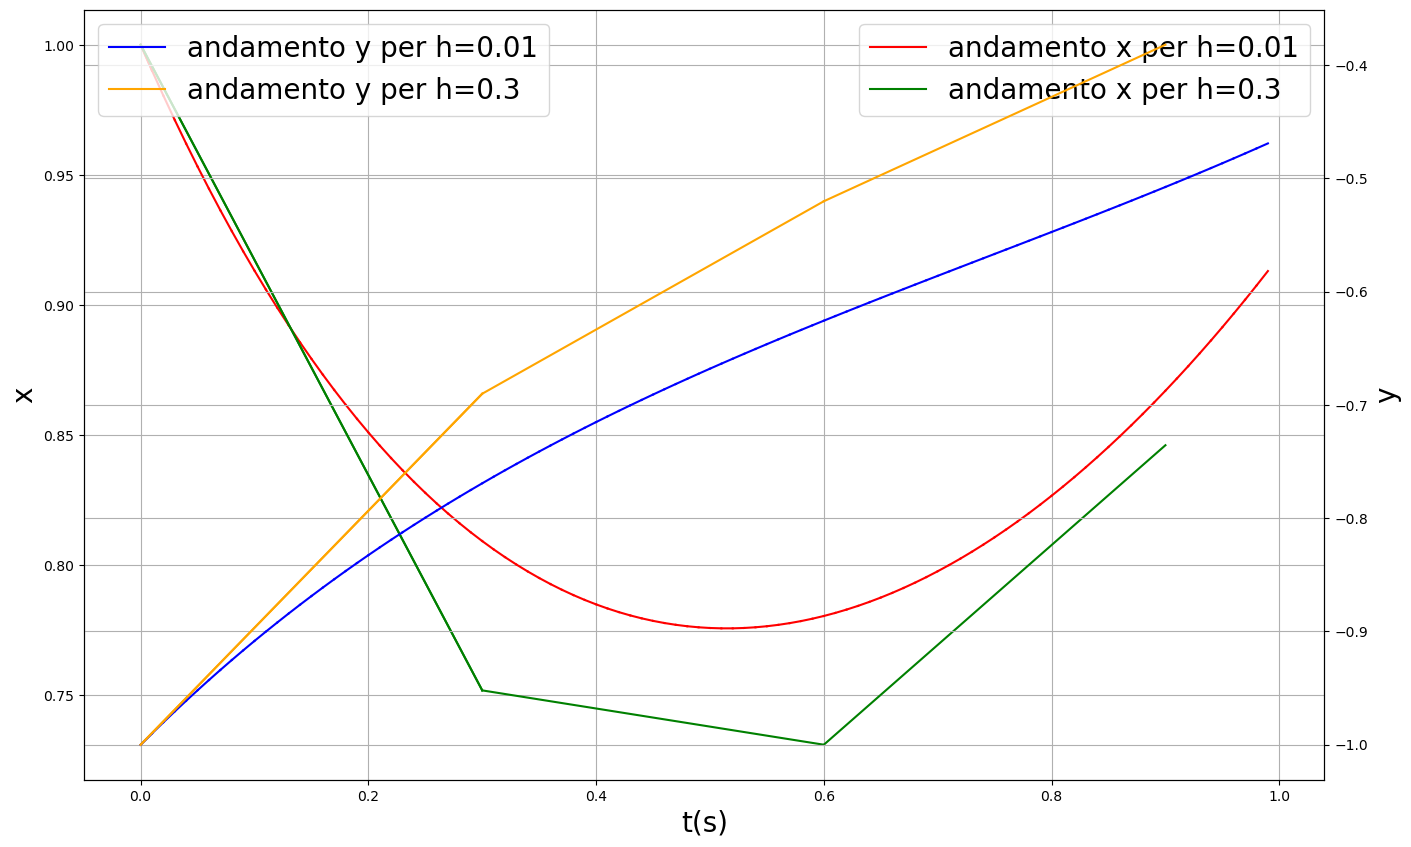

Errore Globale per: h=0.01: (7.194245199571014e-14, 3.413380689210044e-13) h=0.3: (1.680744432519532e-11, 7.744055396941008e-11)
Tempo di elaborazione:  0.5259430408477783 (s)


In [8]:
fig, ax1= plt.subplots(figsize=(16,10))
ax2 = ax1.twinx()
ax1.grid()
ax2.grid()
plot = Felhberg(.01, "red", "blue")
#plot2 = Felhberg(.05)
#plot3 = Felhberg(.1)
plot4 = Felhberg(.3, "green", "orange")

ax1.set_xlabel("t(s)", fontsize = 20)
ax1.legend(loc = "best", fontsize = 20)
ax2.legend(loc= "best", fontsize = 20)
ax1.set_ylabel("x", fontsize = 20)
ax2.set_ylabel("y", fontsize = 20)
plt.show()

print("Errore Globale per: h=0.01:", Felhberg(.01, "red", "blue", a=0) ,"h=0.3:", Felhberg(.03, "red", "blue", a=0))
print("Tempo di elaborazione: ", time()-t_start, "(s)")

# Esercizio 4

-28.223868099097466


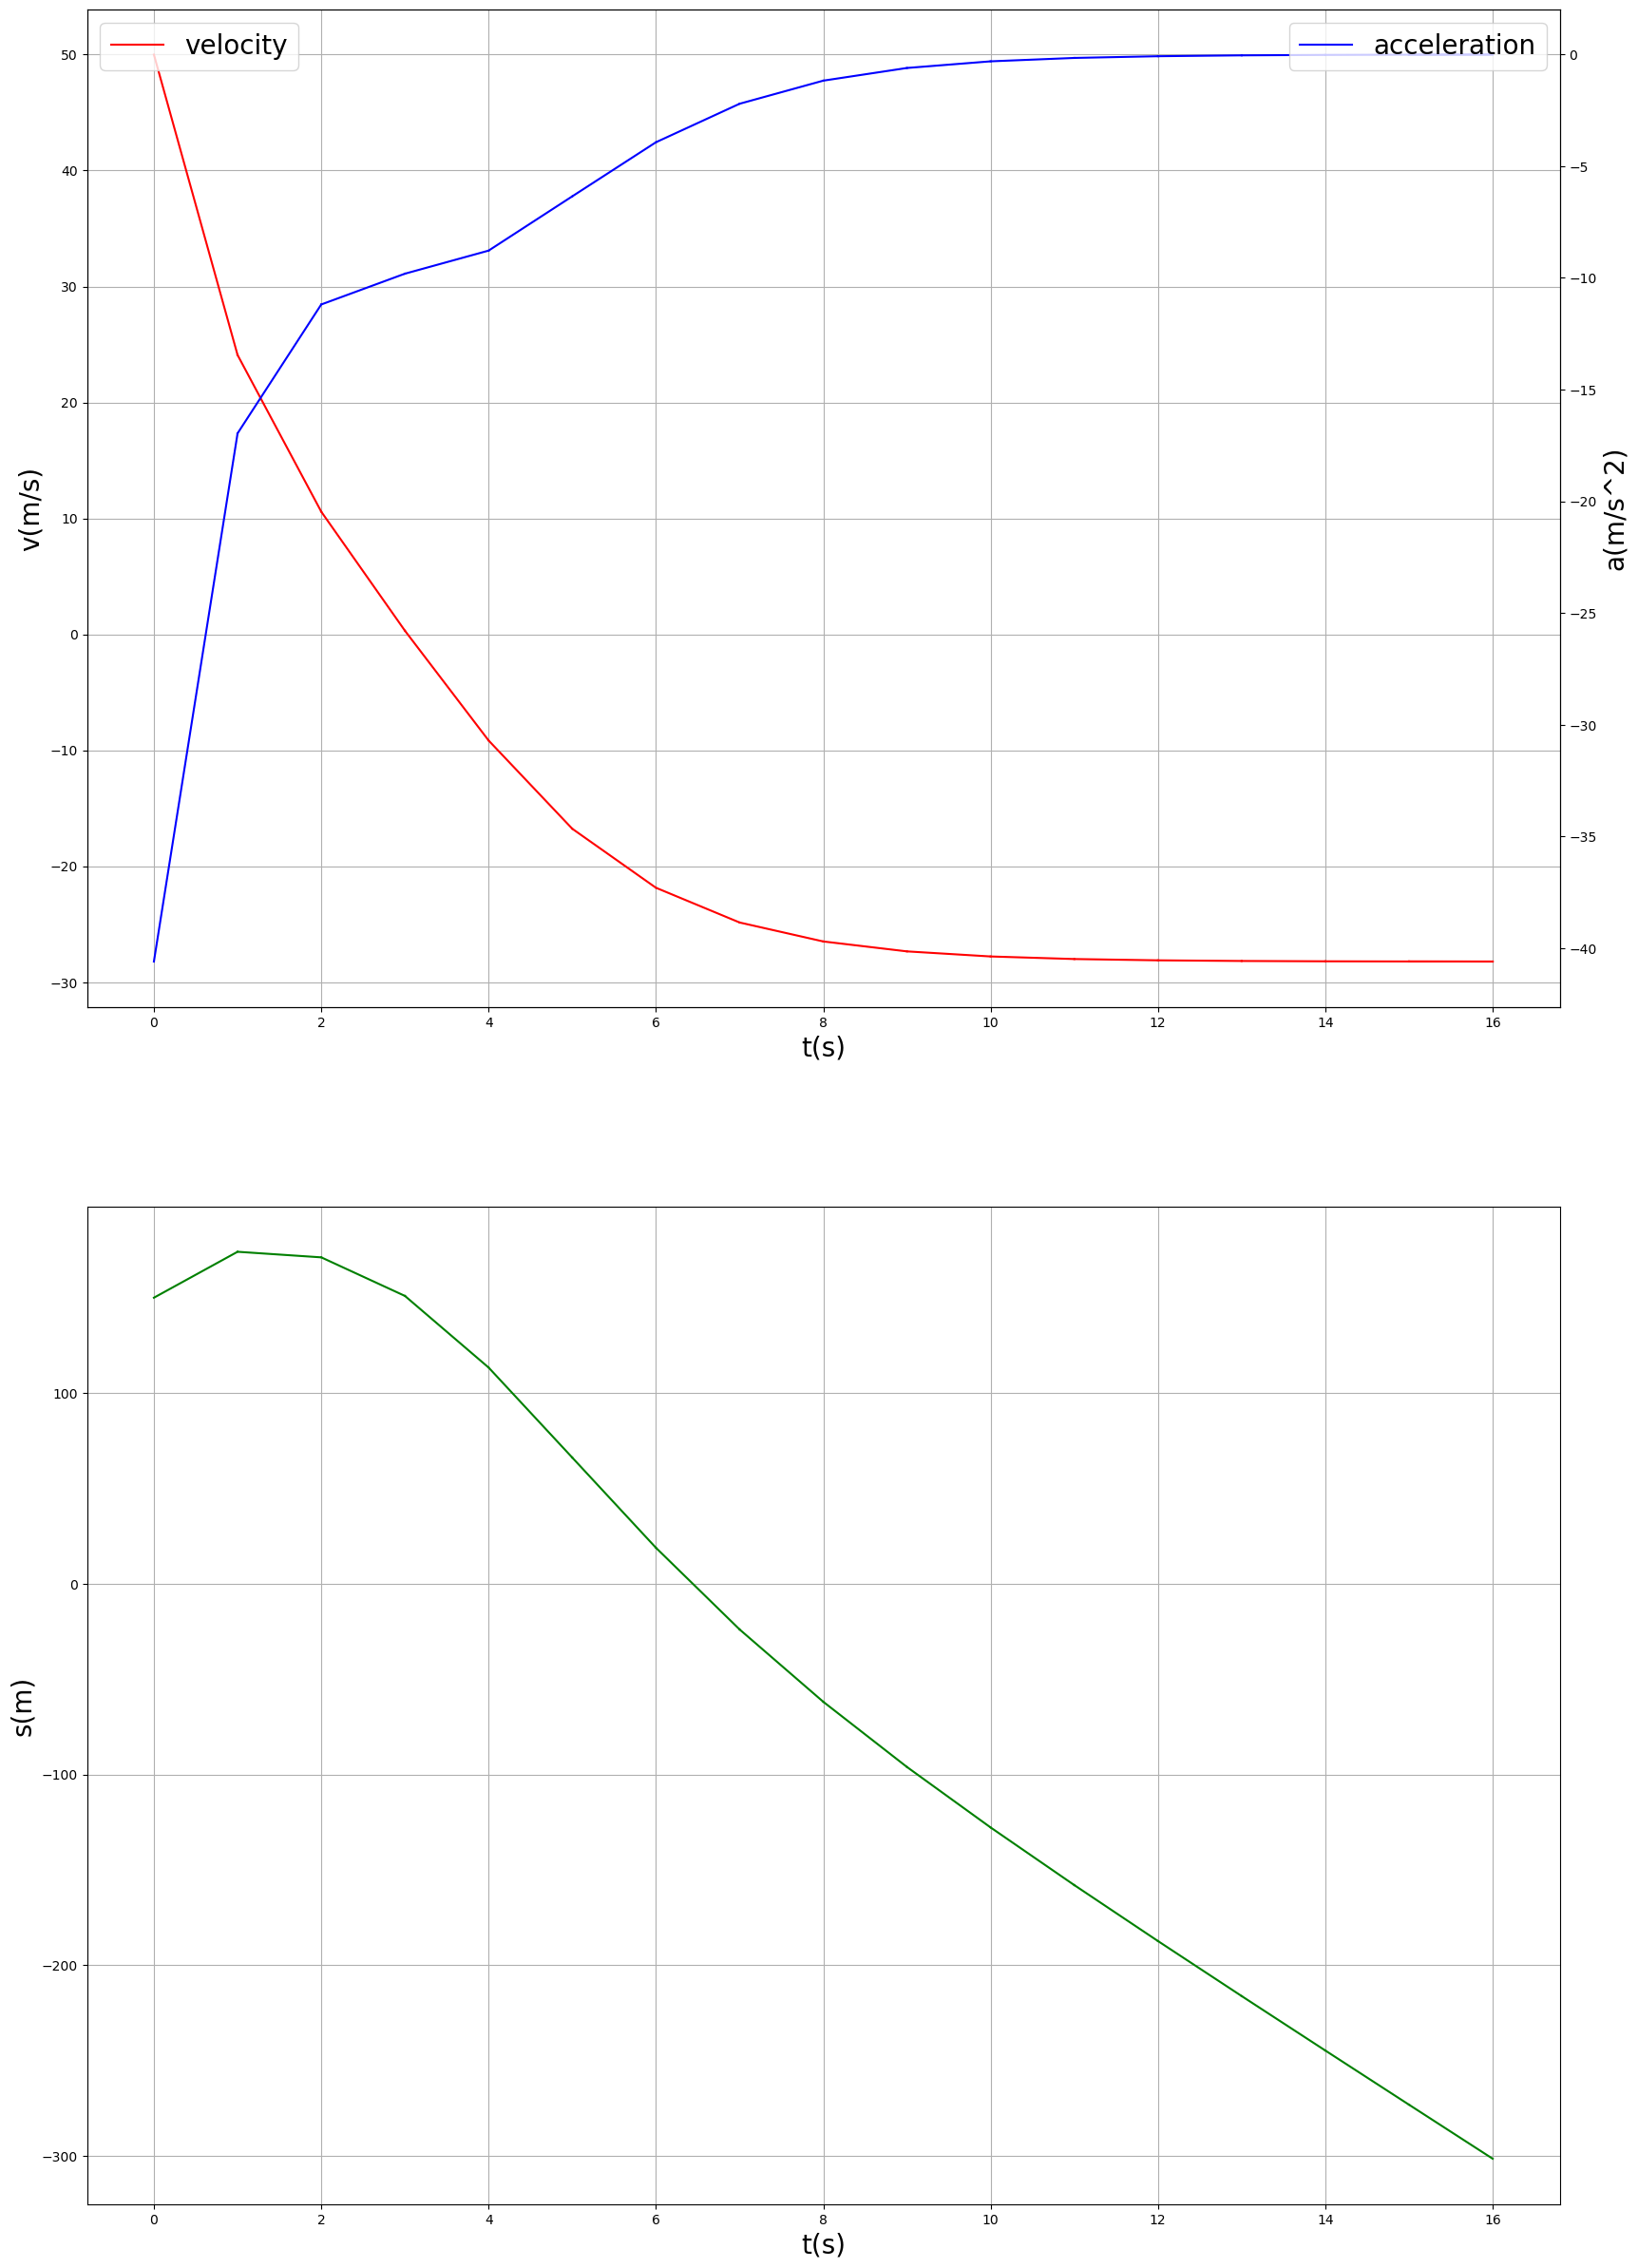

Tempo di elaborazione:  0.4898645877838135 (s)


In [9]:
t_start = time()
g = 9.81
def Fa(v, R=0.008, C=0.5, rho=1.225):
    if v>=0:
        return -0.5*C*rho*np.pi*(R**2)*(v**2)
    else:
        return 0.5*C*rho*np.pi*(R**2)*(v**2)

#assume our y-axis directed as Fa
def acceleration(t, v, m=.005):
    return -g+Fa(v)/m

V_lim = -np.sqrt(0.005*g/(.5*.5*1.225*np.pi*(0.008**2)))
print(V_lim)

def RK4(h, v_0=50, a=1):
    x0 = 150
    t = 0
    v = v_0
    while t<=15:
        v_prev = v
        k_1 = h * acceleration(t, v_prev)
        k_2 = h * acceleration(t+h/2, v_prev+k_1/2)
        k_3 = h * acceleration(t+h/2, v_prev+k_2/2) 
        k_4 = h * acceleration(t+h, v_prev+k_3) 
        v_next=v_prev+(k_1+2*k_2+2*k_3+k_4)/6
        
        
        if a == 1:
            ax1.plot([t,t+h], [v_prev, v_next], color = "red")
            ax3.plot([t,t+h], [acceleration(t, v_prev), acceleration(t+h,v_next)], color = "blue")
            ax2.plot([t,t+h], [v_prev*t+x0, v_next*(t+h)+x0], color = "green")
            if t == 15:
                ax1.plot([t,t+h], [v_prev, v_next], color = "red", label = "velocity")
                ax3.plot([t,t+h], [acceleration(t, v_prev), acceleration(t+h,v_next)], color = "blue", label = "acceleration")
        v = v_next
        t += h

fig, (ax1,ax2)=plt.subplots(2,1, figsize = (20, 30))

ax3=ax1.twinx()
plot = RK4(1)
ax1.set_xlabel("t(s)", fontsize = 20)
ax1.legend(loc = "upper left", fontsize = 20)
ax3.legend(loc= "upper right", fontsize = 20)
ax1.set_ylabel("v(m/s)", fontsize = 20)
ax3.set_ylabel("a(m/s^2)", fontsize = 20)

ax2.set_xlabel("t(s)", fontsize = 20)
ax2.set_ylabel("s(m)", fontsize = 20)
ax1.grid()
ax2.grid()

plt.show()
print("Tempo di elaborazione: ", time()-t_start, "(s)")